In [16]:
import numpy as np
import pandas as pd
import time
import matplotlib.pyplot as plt

Problem - 1: Perform a classification task with knn from scratch.

1. Load the Dataset:

• Read the dataset into a pandas DataFrame.

• Display the first few rows and perform exploratory data analysis (EDA) to understand the dataset

(e.g., check data types, missing values, summary statistics).


In [3]:
df = pd.read_csv("/content/drive/MyDrive/Concepts and Technologies of AI/dataset/diabetes.csv")

2. Handle Missing Data:

• Handle any missing values appropriately, either by dropping or imputing them based on the data.


In [5]:
nullValues = df.isnull().sum()
print(nullValues)
#No null values

Pregnancies                 0.0
Glucose                     0.0
BloodPressure               0.0
SkinThickness               0.0
Insulin                     0.0
BMI                         0.0
DiabetesPedigreeFunction    0.0
Age                         0.0
Outcome                     0.0
dtype: float64


,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


3. Feature Engineering:

• Separate the feature matrix (X) and target variable (y).
• Perform a train - test split from scratch using a 70% − 30% ratio.


In [6]:
df_clean = df.copy()
if 'Outcome' in df_clean.columns:
    target_col = 'Outcome'
else:
    target_col = df_clean.columns[-1]
    print(f"Target column not explicitly labeled 'Outcome'. Using last column as target: {target_col}")

X = df_clean.drop(columns=[target_col]).values
y = df_clean[target_col].values

n = X.shape[0]
indices = np.random.permutation(n)
split_idx = int(0.7 * n)

train_idx, test_idx = indices[:split_idx], indices[split_idx:]
X_train, y_train = X[train_idx], y[train_idx]
X_test, y_test = X[test_idx], y[test_idx]

print("Train size:", X_train.shape[0], "Test size:", X_test.shape[0])

Train size: 537 Test size: 231


4. Implement KNN:

• Build the KNN algorithm from scratch (no libraries like sickit-learn for KNN).

• Compute distances using Euclidean distance.

• Write functions for:

– Predicting the class for a single query.

– Predicting classes for all test samples.

• Evaluate the performance using accuracy.



In [10]:
def euclidean_distance(a: np.ndarray, b: np.ndarray) -> float:
    """
    Compute Euclidean distance between two 1D arrays.
    """
    return np.sqrt(np.sum((a - b) ** 2))

def knn_predict_one(x_query: np.ndarray, X_train: np.ndarray, y_train: np.ndarray, k: int = 5) -> int:
    """
    Predict class for a single query point using KNN (majority vote).
    - Distance: Euclidean
    - Tie-breaker: smallest class label among the tied majority
    """
    dists = np.sqrt(np.sum((X_train - x_query) ** 2, axis=1))
    nn_idx = np.argpartition(dists, k)[:k]
    nn_labels = y_train[nn_idx]
    values, counts = np.unique(nn_labels, return_counts=True)
    return values[np.argmax(counts)]

def knn_predict(X_query: np.ndarray, X_train: np.ndarray, y_train: np.ndarray, k: int = 5) -> np.ndarray:
    """
    Predict classes for all query samples.
    """
    preds = np.zeros(X_query.shape[0], dtype=y_train.dtype)
    for i in range(X_query.shape[0]):
        preds[i] = knn_predict_one(X_query[i], X_train, y_train, k)
    return preds

def accuracy_score(y_true: np.ndarray, y_pred: np.ndarray) -> float:
    return (y_true == y_pred).mean()

k_baseline = 5
t0 = time.time()
y_pred_baseline = knn_predict(X_test, X_train, y_train, k=k_baseline)
t1 = time.time()

acc_baseline = accuracy_score(y_test, y_pred_baseline)
print(f"Baseline (unscaled) KNN | k={k_baseline}: Accuracy={acc_baseline:.4f}, Time={t1 - t0:.4f}s")

Baseline (unscaled) KNN | k=5: Accuracy=0.6970, Time=0.0225s


Problem - 2 - Experimentation:

1. Repeat the Classification Task:

• Scale the Feature matrix X.

• Use the scaled data for training and testing the kNN Classifier.

• Record the results.


In [11]:
X_mean = X_train.mean(axis=0)
X_std = X_train.std(axis=0)
X_std[X_std == 0] = 1.0

X_train_scaled = (X_train - X_mean) / X_std
X_test_scaled = (X_test - X_mean) / X_std

2. Comparative Analysis: Compare the Results -

• Compare the accuracy and performance of the kNN model on the original dataset from problem 1 versus the scaled dataset.

• Discuss:

– How scaling impacted the KNN performance.

– The reason for any observed changes in accuracy.



In [13]:
k_scaled = 5
t0 = time.time()
y_pred_scaled = knn_predict(X_test_scaled, X_train_scaled, y_train, k=k_scaled)
t1 = time.time()

acc_scaled = accuracy_score(y_test, y_pred_scaled)
print(f"Scaled KNN | k={k_scaled}: Accuracy={acc_scaled:.4f}, Time={t1 - t0:.4f}s")
print("Comparison at k=5")
print(f"- Unscaled accuracy: {acc_baseline:.4f}")
print(f"- Scaled accuracy:   {acc_scaled:.4f}")
print("Observation: Scaling changes feature magnitudes, which can impact neighbor selection and thus accuracy.")

Scaled KNN | k=5: Accuracy=0.7229, Time=0.0185s
Comparison at k=5
- Unscaled accuracy: 0.6970
- Scaled accuracy:   0.7229
Observation: Scaling changes feature magnitudes, which can impact neighbor selection and thus accuracy.


Problem - 3 - Experimentation with k:
1. Vary the number of neighbors - k:
• Run the KNN model on both the original and scaled datasets for a range of:

k= 1, 2, 3, . . . 15

• For each k, record:
– Accuracy.
– Time taken to make predictions.


In [14]:
ks = list(range(1, 16))
acc_unscaled_list, time_unscaled_list = [], []
acc_scaled_list, time_scaled_list = [], []

for k in ks:
    t0 = time.time()
    y_pred_u = knn_predict(X_test, X_train, y_train, k=k)
    t1 = time.time()
    acc_unscaled_list.append(accuracy_score(y_test, y_pred_u))
    time_unscaled_list.append(t1 - t0)

    t0 = time.time()
    y_pred_s = knn_predict(X_test_scaled, X_train_scaled, y_train, k=k)
    t1 = time.time()
    acc_scaled_list.append(accuracy_score(y_test, y_pred_s))
    time_scaled_list.append(t1 - t0)

best_k_unscaled = ks[int(np.argmax(acc_unscaled_list))]
best_k_scaled = ks[int(np.argmax(acc_scaled_list))]

2. Visualize the Results:

• Plot the following graphs:

– k vs. Accuracy for original and scaled datasets.

– k vs. Time Taken for original and scaled datasets.


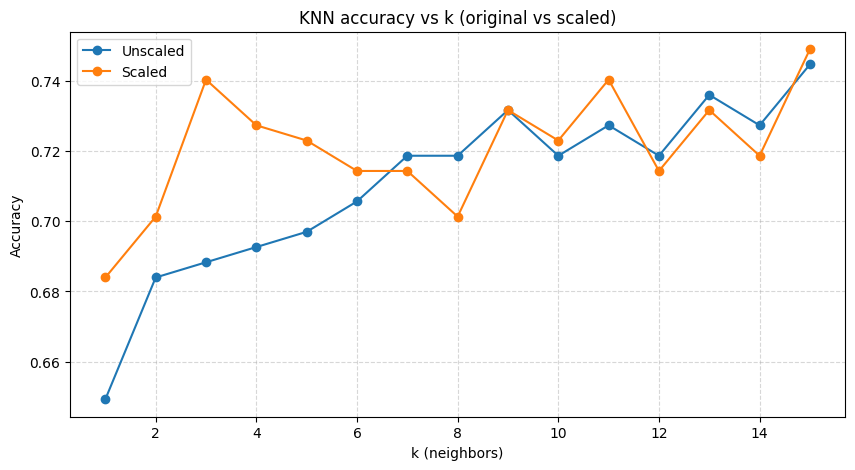

Best k (unscaled): 15 with accuracy 0.7446
Best k (scaled):   15 with accuracy 0.7489


In [17]:
plt.figure(figsize=(10, 5))
plt.plot(ks, acc_unscaled_list, marker='o', label='Unscaled')
plt.plot(ks, acc_scaled_list, marker='o', label='Scaled')
plt.xlabel('k (neighbors)')
plt.ylabel('Accuracy')
plt.title('KNN accuracy vs k (original vs scaled)')
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()
plt.show()

print(f"Best k (unscaled): {best_k_unscaled} with accuracy {max(acc_unscaled_list):.4f}")
print(f"Best k (scaled):   {best_k_scaled} with accuracy {max(acc_scaled_list):.4f}")

3. Analyze and Discuss:
• Discuss how the choice of k affects the accuracy and computational cost.
• Identify the optimal k based on your analysis.


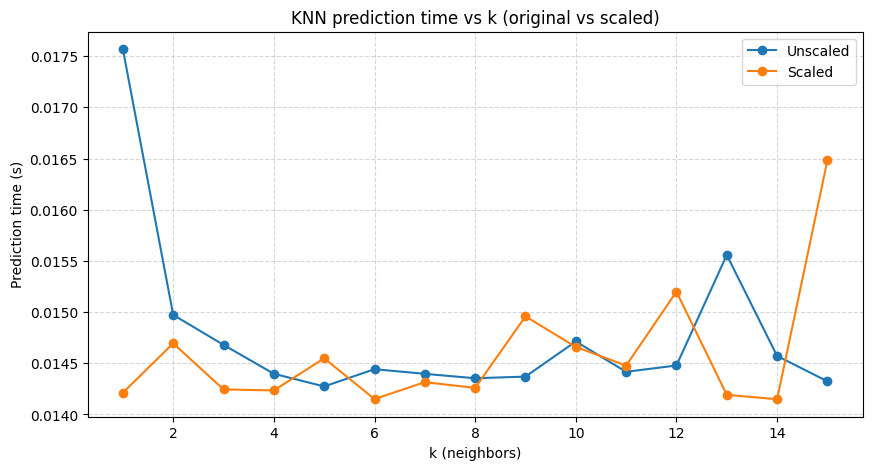

In [18]:
plt.figure(figsize=(10, 5))
plt.plot(ks, time_unscaled_list, marker='o', label='Unscaled')
plt.plot(ks, time_scaled_list, marker='o', label='Scaled')
plt.xlabel('k (neighbors)')
plt.ylabel('Prediction time (s)')
plt.title('KNN prediction time vs k (original vs scaled)')
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()
plt.show()